In [54]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt
%matplotlib inline
import numpy as np

In [55]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [56]:
len(xtrain)

60000

In [57]:
len(ytrain)

60000

In [58]:
xtrain.shape

(60000, 28, 28)

In [59]:
xtest.shape

(10000, 28, 28)

In [60]:
xtrain=xtrain/255
xtest=xtest/255

In [61]:
xtrain[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

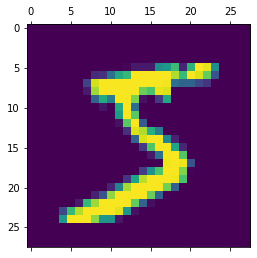

In [62]:
plt.pyplot.matshow(xtrain[0])

In [67]:
#flatten 
xtrain_flattened=xtrain.reshape(len(xtrain),28*28)

In [68]:
xtest_flattened=xtest.reshape(len(xtest),28*28)
xtest_flattened.shape

(10000, 784)

In [69]:
#creating a neural network
#sequential means there are stack of layers in the neural network
#dense means all the neuron in one layer are connected with the neurons in the other layer
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain_flattened,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4745 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3048 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2840 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9257


In [70]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.2689 - accuracy: 0.9248


[0.26890137791633606, 0.9247999787330627]

In [71]:
ypredicted=model.predict(xtest_flattened)
ypredicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.12033782e-02, 5.40378721e-07, 7.41093829e-02, 9.49541152e-01,
       2.09915265e-03, 8.83113071e-02, 1.01341163e-06, 9.99775171e-01,
       1.17003374e-01, 6.65985167e-01], dtype=float32)

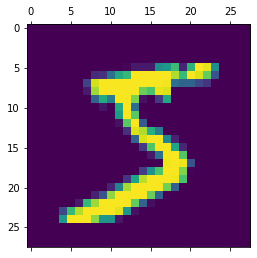

In [72]:
plt.pyplot.matshow(xtrain[0])

In [73]:
#finds the max element from the array and return the value
np.argmax(ypredicted[0])

7

In [74]:
ypredictedlabels=[np.argmax(i)for i in ypredicted]

In [75]:
ypredictedlabels[:7]

[7, 2, 1, 0, 4, 1, 4]

In [76]:
#building confusion matrix
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypredictedlabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    4,    6,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,   10,  911,   17,    7,    3,   13,    9,   52,    3],
       [   4,    0,   17,  922,    0,   21,    2,   11,   26,    7],
       [   1,    1,    3,    2,  913,    0,   12,    4,   11,   35],
       [   9,    3,    1,   37,    8,  767,   16,    6,   38,    7],
       [  12,    3,    6,    1,    7,   10,  914,    2,    3,    0],
       [   1,    7,   22,    7,    5,    0,    0,  950,    5,   31],
       [   5,    9,    6,   18,    9,   19,    9,   10,  884,    5],
       [  10,    7,    1,   10,   28,    6,    0,   22,   11,  914]])>

Text(69.0, 0.5, 'Truth')

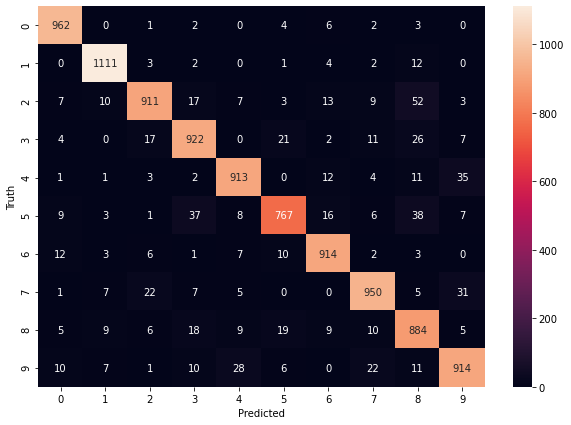

In [80]:
import seaborn as sn
plt.pyplot.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.pyplot.xlabel('Predicted')
plt.pyplot.ylabel('Truth')

In [82]:
#using hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain_flattened, ytrain, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2676 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1226 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0859 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0654 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0518 - accuracy: 0.9842


In [84]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9735


[0.09040746092796326, 0.9735000133514404]